## A Hands-on Workshop series in Machine Learning
### Session 3: Classification Algorithms 
#### Instructor: Aashita Kesarwani

This is one of the notebooks for the third session of the [Machine Learning workshop series at Harvey Mudd College](http://www.aashitak.com/A-Hands-on-Workshop-series-in-Machine-Learning/). It involves a gentle introduction of logistic regression algorithm.

Please:
- Resize the Zoom and Web browser with Jupyter notebook so that you have both of them side by side. 
- Ask questions. Type in the chat window or raise your hand to speak.
- Answer questions and participate in the discussion - type in the chat window or unmute yourself to speak.
- Ask for help, whenever needed, for the exercises.
- Mute yourself when not speaking. 

##### What is machine learning?
- Learning from data without explicit programming.

##### Two main basic tasks for machine learning algorithms:
- Classification
- Regression (curve-fitting)

### Classification: 
Predicting classes for the data points.

How does it work?  
We find a decision boundary using labeled training data and then use it to determine the labels for the unseen data.

An example of the decision boundary for binary classification algorithm: 

<img src="https://camo.githubusercontent.com/f663cd4f29335972950dded4d422c07aeee8af55/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a34473067737539327250684e2d636f397076315035414032782e706e67" width="300" height="350" />
<p style="text-align: center;"> Logistic Regression classifier - separates the classes using a linear boundary  </p>

The logistic classifier, also known by its misnomer logistic regression, is one of the simplest cases of the neural networks pared-down to a single layer.

#### Formulation of logistic classifier:
For binary classification, we assign the two classes the labels 0 and 1.
* The class labeled 1 is also called the positive class. 
* The class labeled 0 is also called the negative class. 

In general, we would want our classifier to give us the probabilities corresponding to each class, instead of the class label. Can you guess why?

* The classifier predicts the probability ($p$) that an observation belongs to the positive class. 
* The probability for the class labeled $0$ (or the negative class) would be $1-p$.

The examples farther from the decision boundary should be classified with more certainity (or higher probability) than those closer to the decision boundary.

Q: How do we mathematically quantify how close a point is to the decision boundary?

To answer that, let us first clearly formulate the classification model:
* Our training set consists of pairs, say (input, target) where the target is the class label - $0$ or $1$. 
* Let there be $n$ features in our dataset, then each input can be considered a point $(x_1, x_2, \dots, x_n)$ in the $n$-dimensional space.

The classification task is to find the optimal decision boundary to separate the classes. For the logistic regression, this boundary is linear. 

* For the case of two features, this linear boundary is simply a line in 2-dimensional plane.
* For three features, the linear boundary would be a linear plane separating the two classes in 3-dimensional plane.
* In general, the linear boundary is a $n-1$ dimensional linear hyperplane in a $n$-dimensional space.

<img src="https://camo.githubusercontent.com/f663cd4f29335972950dded4d422c07aeee8af55/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f313630302f312a34473067737539327250684e2d636f397076315035414032782e706e67" width="300" height="350" />
<p style="text-align: center;"> Logistic Regression classifier </p>


To be able to visualize and understand intuitively, let us use only two features, say $x_1$ and $x_2$. Let us assume the following line $x_1-x_2-1=0$ is the linear decision boundary for the logistic classifier in the figure above.


Math question: We represent the following line using the equation $x_1-x_2-1=0$. How do we mathematically represent the two regions that are separated by this line?

![](https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/fig1.png?raw=true)

The region containing the origin is given by $x_1-x_2-1<0$ whereas the other one by $x_1-x_2-1>0$.

![](https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/fig2.png?raw=true)

The expression $x_1-x_2-1$ have values higher in magnitude for points away from the line and lower values for points closer to the line.

![](https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/figure3.png?raw=true)

To summarize in a nutshell, the expression $w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b$ can be used to quantify how close a point is to the decision boundary and if use we combine it with a suitable function, it can give us the probability for the positive class. The **sigmoid logistic function** is used for this purpose as follows:

$$Prob(y=1) = sig(w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b) $$ 

where $sig$ is the sigmoid logistic function 
$$sig(t) = \frac{1}{1+e^{-t}}$$

<img src="https://upload.wikimedia.org/wikipedia/commons/5/53/Sigmoid-function-2.svg" width=400 />

The S-shaped curve is called sigmoid because of its shape and it is widely used in population growth models and hence, the [name logistic](https://en.wikipedia.org/wiki/Logistic_function).

Observations:
* The output of the sigmoid lies between 0 and 1, which corresponds to the probability in our case. 
* The logistic function (and hence the probability) approximates to 1 for large positive values, whereas it converges to 0 for large negative values. 
* The value for $w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b$ is positive for points in the region on one side of the line and negative for the other. The magnitude of the values (positive or negative) is higher for points far away from the line.
* In view of the above equation for logistic regression and the properties of sigmoid logistic function, the points farther away from the line will be classified with a high probability to one class or the other, whereas the probability will be closer to 0 for points close to the line.
 
In general, we set the threshold for probability to be 0.5. This means:
* Whenever $w_1*x_1 + w_2*x_2 + \cdots + w_n*x_n + b \geq 0$, it is classified to the positive class 
* Whenever $w_1*x_1 + \cdots + w_n*x_n + b < 0$, it is classified to the negative class. 
* The points for which the value for $w_1*x_1 + \cdots + w_n*x_n + b$ is not large in magnitude have probabilities that are closer to 0.5. Such points needs to be classified with extra care, as we will see later on in evaluation metrics. 

To learn a good decision boundary, we need to **find optimal weights**. How can we make use of our training data for that purpose?

Let us use an example for illustration.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

from sklearn import datasets
iris = datasets.load_iris()

df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['class'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


The iris dataset is a classic dataset used in machine learning. It consists of iris flowers that fall into three species (setosa, virginica, and versicolor) with four measurements for each flower.

Let us plot the petal length vs the petal width for the three classes of iris flowers.

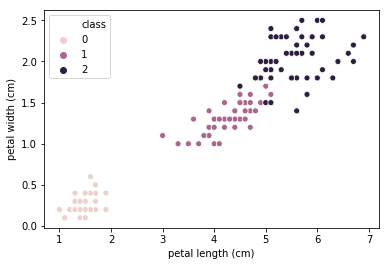

In [2]:
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='class', data=df);

We will focus on classifying between species 1 and 2, so we will drop class 0 and rename classes 1 and 2 as 0 and 1 respectively.

In [3]:
df = df[df['class']!=0]
df['class'].replace({1: 0, 2: 1}, inplace=True)

In [4]:
df['class'].value_counts()

1    50
0    50
Name: class, dtype: int64

We note that the two classes are equally distributed with 50 samples each.

Let us plot the samples again and try to draw linear decision boundaries.

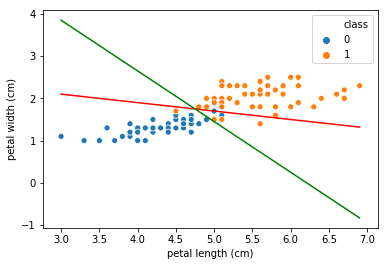

In [5]:
x_min, x_max = df['petal length (cm)'].min(), df['petal length (cm)'].max()

def plot_line(w, b, color):
    x_values = np.linspace(x_min, x_max, 100)
    y_values = w*x_values + b
    plt.plot(x_values, y_values, color)
    
plot_line(w=-0.2, b=2.7, color='r-');
plot_line(w=-1.2, b=7.45, color='g-');
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='class', data=df);

* Which of the above two lines - red or green is a better decision boundary?
* How do we decide that? What metrices should we use to guide that decision?
* Should we only consider whether the points are correctly classified or not? If not, what else?

Finding the optimal line is same as learning the weights $w_1, w_2, \dots, w_n$ and $b$. We use the log loss function defined below to quantify the error of misclassification.

Recall that $p$ is the probability that the data point belongs to the positive class with label $1$.  
For points with label $y=1$, the cost is

$$ c(y, p) = - \log(p) \ \ \ \ \ \ \ \ \ \text{ if }\ \  y = 1$$

whereas for points with label $y=0$, the cost is

$$ c(y, p) = - \log(1-p) \ \  \text{ if }\ \  y = 0$$

Recall that:
$$\lim_{p \to 1} \log(p) = 0 \quad \text{ and } \quad \lim_{p \to 0} \log(p) = -\infty$$ 
<img src="https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/log.png?raw=true" width=250 height=250>

Observations:  
For data point with the true class $y=1$
* As the predicted probability $p \to 0$, the cost $c \to \infty$.
* As the predicted probability $p \to 1$, the cost $c \to 0$.  

For data point with the true class $y=0$
* As the predicted probability $p \to 0$, the cost $c \to 0$.
* As the predicted probability $p \to 1$, the cost $c \to \infty$.

The following figure plots the cost function for the data points belonging to the two classes (red for $y=1$ and blue for $y=0$)
<img src="https://github.com/AashitaK/ML-Workshops/blob/master/Session%204/figures/logloss.png?raw=true" width=350 height=350>

The cost function takes the average over the costs for all points. The costs for the two classes $y=0$ and $y=1$ can be summed up in the following formula.

$$ J = \frac{1}{N} \sum_{i=1}^N c(y, p) = - \frac{1}{N} \sum_{i=1}^N y \log(p) + (1-y) \log(1-p)$$

where $p=Prob(y=1)$, which is the output of our logistic regression classifier.

*This log loss cost function used to model the logistic classifier with the linear decision boundary has another derivation using the probabilistic approach given [here](http://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression/) and [here](https://houxianxu.github.io/2015/04/23/logistic-softmax-regression/). If you have not yet learned the probability concepts in much depth, it would be a good idea to skip this derivation for the time being as it is not particularly relevant as we are trying to build our intuition of neural networks based on logistic regression and hence, it has been skipped from the notes.*

The cost function $J$ is consequently a function of the weights $w_1, w_2, \dots, w_n$ and the bias term $b$, that is $J(w_1, w_2, \dots, w_n, b)$. Can you see how?

As we saw above, the data points in the figure are given to us, whereas it is the the decision boundary that we can adjust to minimize the error of the classification.

To rephrase it, the training set with the pairs of input $x$ and the target $y$ is given to us. It is the weights $w_1, w_2, \dots, w_n$ and the bias term $b$ that we can adjust to minimize the cost function.

How do we find the optimal values for $w_1, w_2, \dots, w_n$ and $b$ to minimize $J$?

To answer that, let us digress a little bit.

Suppose you are standing at the top of a hill and want to descend to the plain. If you do not have any specific destination in mind, but want to take the least number of steps to reach the plain, what would be your **strategy for each step on your way**? 

Have you noticed the paths followed by the creeks along the mountains? 

Ans: You pick the direction of the steepest descent at each step.

Let us formulate this optimization strategy in mathematical terms. 

Q: Given a curve represented by a function $J(w)$, how do you get the slope of the curve at each point?

Q: Given a curve represented by a multi-variable function $J(w_1, w_2, \dots, w_n, b)$, how do you get the slope of the curve at each point?

##### What are gradients?
Gradients can be thought of as an extension of derivatives. For a multivariable function $f$, the [gradient](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivative-and-gradient-articles/a/the-gradient) of $f$ is the vector of partial derivatives. 

$$ \nabla f(x_1, x_2, \dots, x_n) = \left(\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right)$$

Geometrically, the gradient points in the direction of the steepest slope.

**Questions to ponder over:**
* If we move in the direction of steepest descent, are we always guaranteed to reach the minimum point?
* If the answer is no to the above questions, are there any cases for the function $J$ for which reaching the minima is guaranteed?

Neural networks also use the gradient descent algorithm for the training process and we will come back to this question in a later session.

##### Gradient Descent Algorithm
Gradient Descent algorithm is used to iteratively update the weights using the training examples so as to minimize the cost function $J$. 

The weights are updated in the direction of the steepest descent of the cost function $J$ in each iteration. 

$$ w := w - \alpha \nabla J $$

where $\nabla J$ is the gradient of the cost function $J$ and $\alpha$ is the learning rate that determines the size of steps that we take descending on the path of gradient.

<img src="https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization_files/ball.png" width="350" height="450" />
<p style="text-align: center;"> Minimizing the cost function using gradient descent </p> 

**Optional homework exercise:** Derive the following weight update formula by taking the gradient of the cost function $J$:

$$ w_j := w_j - \alpha \frac{1}{m} \sum_{i=1}^m (p^{(i)} - y^{(i)}) x_j^{(i)}  $$

where $m$ is the number of training examples.

In a nutshell, the learning process can be summarized as iteratively updating the weights using the training data to keep on ***minimizing the cost function***. The gist of the learning process for the neural network is the same, though the formulation of the cost function and the equation for calculating $y$ for a given $x$ will vary a lot depending on the architecture of the neural network. 


Three classifiers A, B and C are trained on a given labeled dataset. The accuracy of the trained classifiers in predicting the labels correctly on the same dataset is as follows.

|Models | Accuracy| 
|---|---|
| Model A | 90%|
| Model B | 80%|
| Model C | 70%|

Clearly, model A is better at predicting labels for the training data than model B and C. Do you think model A will do a better job in predicting labels for yet unseen data as well?


***When should we stop the iterative learning process? Until the cost function has reached its minimum value?*** 


To answer the question, let us consider this binary classification problem with two variables (features). 
<img src="https://upload.wikimedia.org/wikipedia/commons/1/19/Overfitting.svg" width="250" height="250" />

* Which of the two decision boundaries (black or green) will have a lower value for the cost function?
* Which decision boundary would you prefer for classifying the unseen examples?

Since the cost function is calculated solely based on the training dataset, minimizing it too much might mean that the model do not generalize well to unseen examples. This is called overfitting. 


***Over-fitting and under-fitting to the training set***  
The models can over-train on a dataset, that is they learn the dataset so well that they do not generalize well to the examples outside of that dataset. 

If we try to fit too complex of a curve as the decision boundary separating the classes and we don't have enough training examples to estimate the parameters for the curve, then we suffer from over-fitting.

On the other hand, if we try separating the classes with an over-simplified curve as the decision boundary and we have enough training examples to estimate a curve that would be a better fit, then we suffer from under-fitting. 

<img src="https://vitalflux.com/wp-content/uploads/2015/02/fittings.jpg" width="600" height="800" />

How do we know whether our model is overfitting or underfitting to the training set?

Answer: At the beginning, we save some examples as the validation set and use it to test the performance of the model. 

|Models | Accuracy on the training set | Accuracy on the validation set | 
|---|---|---|
| Model A | 90%| 70% |
| Model B | 80%| 75% |
| Model C | 70%| 65% |

* With this additional information, can you guess which model will likely perform better for the unseen data?
* Which of these three models would you suspect for overfitting to the training data?
* Which of these three models would you suspect for underfitting to the training data?

#### Key take-aways so far:
- Always save some examples from the datasets for testing model performance.
- Pay attention to the model performance on the validation set rather than solely on the training set.
- Watch out for both under-fitting and over-fitting.

Now we demonstrate how to use the built-in Logistic classifier from the scikit-learn module for the iris dataset seen above. Let us split the dataset into training and validation sets for the cross validation.

In [ ]:
from sklearn.model_selection import train_test_split
# default is 75% / 25% train-test split
X, y = df.drop('class', axis=1), df['class']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=0)

We create a logistic classifier using [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

In [ ]:
from sklearn.linear_model import LogisticRegression

LR_clf = LogisticRegression()

Next we train the classifier using the training data:

In [ ]:
LR_clf.fit(X_train, y_train)

Now, we test the accuracy of the classifier on both training and validation dataset.

In [ ]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR_clf.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on validation set: {:.2f}'
     .format(LR_clf.score(X_valid, y_valid)))

### Acknowledgements:

The credits for the images used above are as follows.
- Image 1 and 2: https://github.com/trekhleb/machine-learning-octave/tree/master/logistic-regression
- Image 6: https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e
- Image 9: https://rasbt.github.io/mlxtend/user_guide/general_concepts/gradient-optimization/
- Image 10: https://commons.wikimedia.org/wiki/File:Overfitting.svg
- Image 11: https://vitalflux.com/wp-content/uploads/2015/02/fittings.jpg

The inspiration for the code for the function `plot_decision_boundary` is taken from the following Github gist:
- https://gist.github.com/anandology/772d44d291a9daa198d4

References:
- [Applied Machine Learning in Python](https://www.coursera.org/learn/python-machine-learning?specialization=data-science-python) course by University of Michigan in Coursera